Melbourne Housing Market8

In [1]:
import numpy as np 
import pandas as pd
#pd.set_option('display.max_rows', 800)
#pd.set_option('display.max_columns', 500)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:/Medium/3 Learned/Melbourne Housing Market/Melbourne_housing_FULL.csv")
df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
df.describe()  

Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946     401.26706     37.328178   
min        0.000000      0.000000       0.000000       0.00000   1196.000000   
25%        1.000000      1.000000     224.000000     102.00000   1940.000000   
50%        2.000000      2.000000     521.000000     136.00000   1970.000000   
75%        2.000000      2.000000     670.000000     188.00000   2000.000000   
max       12.000000     26.000000  433014.000000   44515.00000   2106.000000   

          Lattitude    Longtitude  Propertycount  
count  26881.000000  26881.000000   34854.000000  
mean     -37.810634    145.001851    7572.888306  
std        0.090279      0.120169    4428.090313  
min      -38.190430    144.423790      83.000000  
25%      -37.862950    144.933500    4385.000000  
50%      -37.807600    145.007800    6763.000000  
75%      -37.754100    145.071900   10412.000000  
max      -37.390200    145.526350   21650.000000

In [5]:
df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [6]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')
Categorical columns: 
 Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [7]:
df.drop(["Address","Date","Postcode","Lattitude","Longtitude","Date"], axis=1,inplace=True)
df.dropna(inplace=True)

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column . 

df['Suburb']= label_encoder.fit_transform(df['Suburb'])
df['Type']= label_encoder.fit_transform(df['Type'])
df['Method']= label_encoder.fit_transform(df['Method'])
df['SellerG']= label_encoder.fit_transform(df['SellerG'])
df['Regionname']= label_encoder.fit_transform(df['Regionname'])
df['CouncilArea']= label_encoder.fit_transform(df['CouncilArea'])
  
df.head()

Suburb  Rooms  Type      Price  Method  SellerG  Distance  Bedroom2  \
2        0      2     0  1035000.0       1       22       2.5       2.0   
4        0      3     0  1465000.0       3       22       2.5       3.0   
6        0      4     0  1600000.0       4      147       2.5       3.0   
11       0      3     0  1876000.0       1      147       2.5       4.0   
14       0      2     0  1636000.0       1      147       2.5       2.0   

    Bathroom  Car  Landsize  BuildingArea  YearBuilt  CouncilArea  Regionname  \
2        1.0  0.0     156.0          79.0     1900.0           31           2   
4        2.0  0.0     134.0         150.0     1900.0           31           2   
6        1.0  2.0     120.0         142.0     2014.0           31           2   
11       2.0  0.0     245.0         210.0     1910.0           31           2   
14       1.0  2.0     256.0         107.0     1890.0           31           2   

    Propertycount  
2          4019.0  
4          4019.0  
6          4019.0  
11         4019.0  
14         4019.0

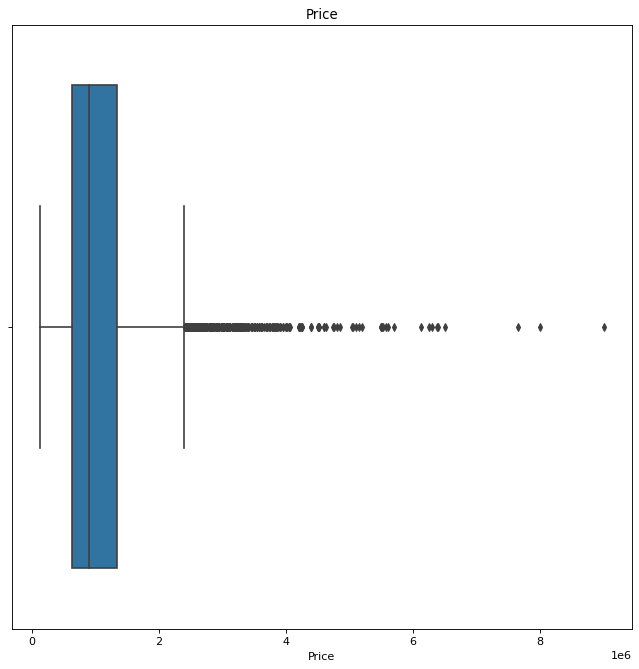

In [8]:
# Let's check the distribution of y variable
plt.figure(figsize=(10,10), dpi= 80)
sns.boxplot(df['Price'])
plt.title('Price')
plt.show()

<AxesSubplot:title={'center':'Price Distribution Plot'}, xlabel='Price', ylabel='Density'>

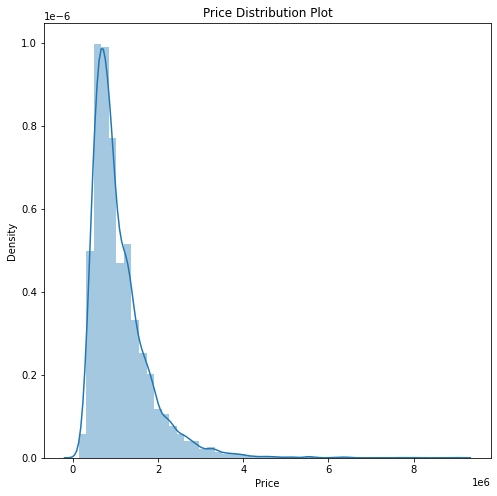

In [9]:
plt.figure(figsize=(8,8))
plt.title('Price Distribution Plot')
sns.distplot(df['Price'])

In [10]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance',
       'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Regionname', 'Propertycount'],
      dtype='object')
Categorical columns: 
 Index([], dtype='object')


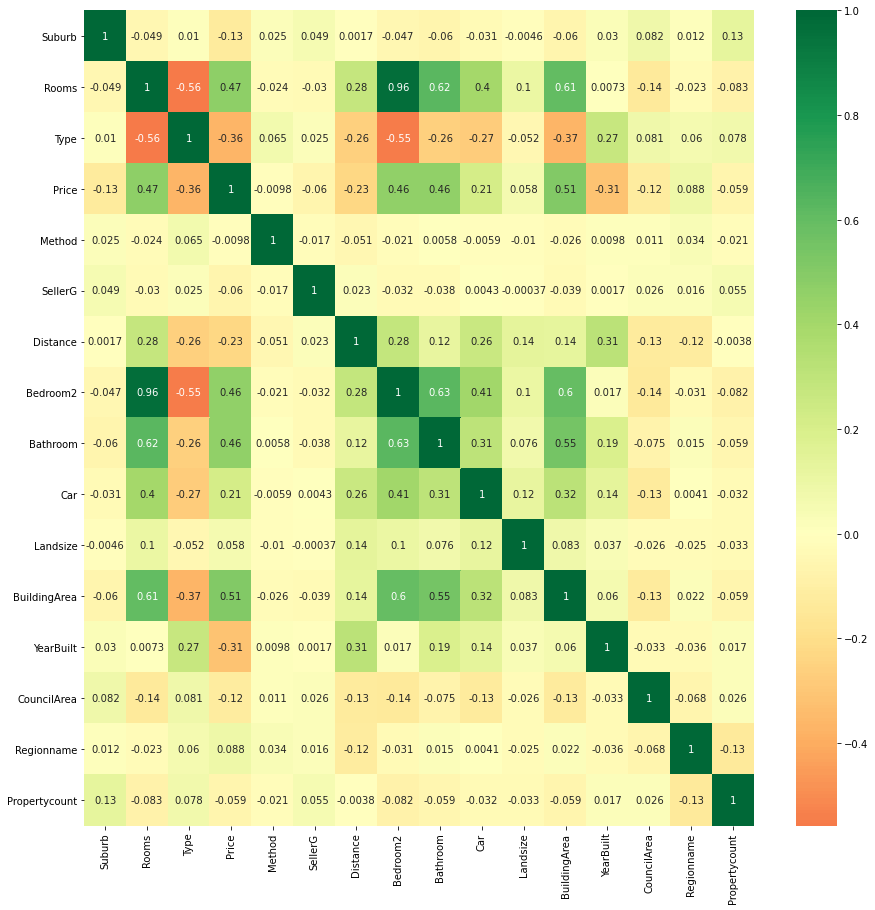

In [11]:
# Let's check the multicollinearity of features by checking the correlation matric

plt.figure(figsize=(15,15))
p=sns.heatmap(df[num_col].corr(), annot=True,cmap='RdYlGn',center=0)

Model Building

In [12]:
# Train test split
X = df.drop(['Price'], axis = 1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=500)

In [13]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


Gradient Boosting Regression

    learning_rate = 0.05


In [14]:
gbr = GradientBoostingRegressor(learning_rate = 0.05, random_state = 100)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAPE     : ",mean_absolute_percentage_error(y_test,y_pred))

r2 score :  0.7160441750754507
MAPE     :  18.6465355762104



Summary :

MAPE is quite higher, so let's try to tune the parameter again



Gradient Boosting Regression

    learning_rate = 0.1


In [15]:
gbr = GradientBoostingRegressor(learning_rate = 0.1, random_state = 100)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAPE     : ",mean_absolute_percentage_error(y_test,y_pred))

r2 score :  0.744745593701359
MAPE     :  16.352564919905742



Summary :

MAPE has improved as compared to the earlier model, let's try to tune the parameter using gridsearch


Grid Search

In [16]:
gbr = GradientBoostingRegressor(random_state = 100)

# defining parameter range 
param_grid={'n_estimators':[100,200,300], 
            'learning_rate': [0.2,0.3,0.5],
            'max_depth':[2,3,5], 
            'min_samples_leaf':[1,3,5]}   
  
grid = GridSearchCV(gbr, param_grid, refit = True, verbose = 3, n_jobs = -1) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=GradientBoostingRegressor(random_state=100), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.5],
                         'max_depth': [2, 3, 5], 'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [17]:
# Best parameter after hyper parameter tuning 
print(grid.best_params_) 
  
# Moel Parameters 
print(grid.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 300}
GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=5,
                          n_estimators=300, random_state=100)


In [18]:
# Prediction using best parameters
grid_predictions = grid.predict(X_test) 
  
print("r2 score : ",r2_score(y_test,grid_predictions))
print("MAPE     : ",mean_absolute_percentage_error(y_test,grid_predictions))

r2 score :  0.7836794176747549
MAPE     :  14.638460428713366


In [19]:
#You can still decrease the mape by trying out different values for estimators ,learning depth and other factors,
#but be mindful that trying out of more values means it will lead to pressure on your RAM and the process will take a lot of time
#Maybe hours as well and your computer might get hanged in between, so do it only if you have powerful gpu and good ram.

In [20]:
import pandas as pd 
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (34857, 21)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 34857 rows, 20 cols
Data Set columns info:
* Suburb: 0 nulls, 351 unique vals, most common: {'Reservoir': 844, 'Bentleigh East': 583}
* Address: 0 nulls, 34009 unique vals, most common: {'5 Charles St': 6, '25 William St': 4}
* Rooms: 0 nulls, 12 unique vals, most common: {3: 15084, 2: 8332}
* Type: 0 nulls, 3 unique vals, most common: {'h': 23980, 'u': 7297}
* Method: 0 nulls, 9 unique vals, most common: {'S': 19744, 'SP': 5095}
* SellerG: 0 nulls, 388 unique vals, most common: {'Jellis': 3359, 'Nelson': 3236}
* Date: 0 nulls, 78 unique vals, most common: {'28/10/2017': 1119, '17/03/2018': 970}
* Distance: 1 nulls, 215 unique vals, most common: {11.2: 1420, 13.8: 681}
* Postcode: 1 nulls, 211 unique vals, most common: {3073.0: 844, 3046.0: 638}
* Bedroom2: 8217 nulls, 15 unique vals, most common: {3.0: 11881, 4.0: 6348}


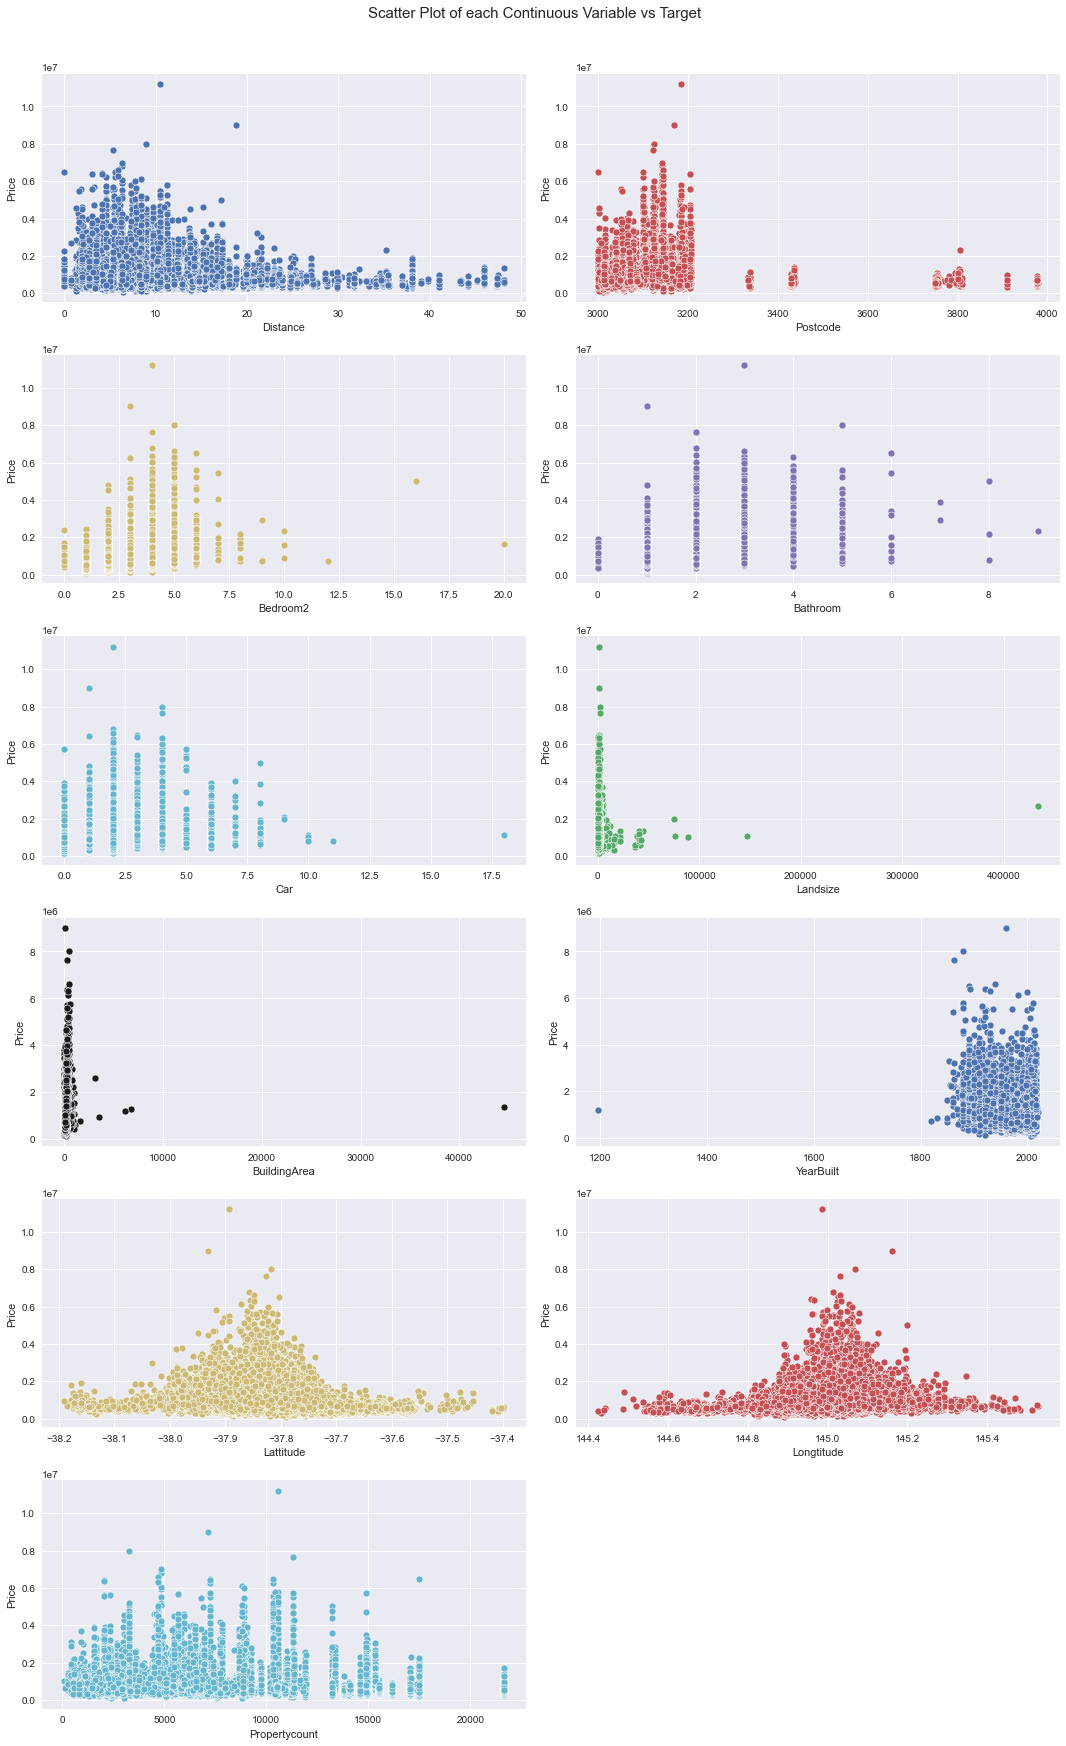

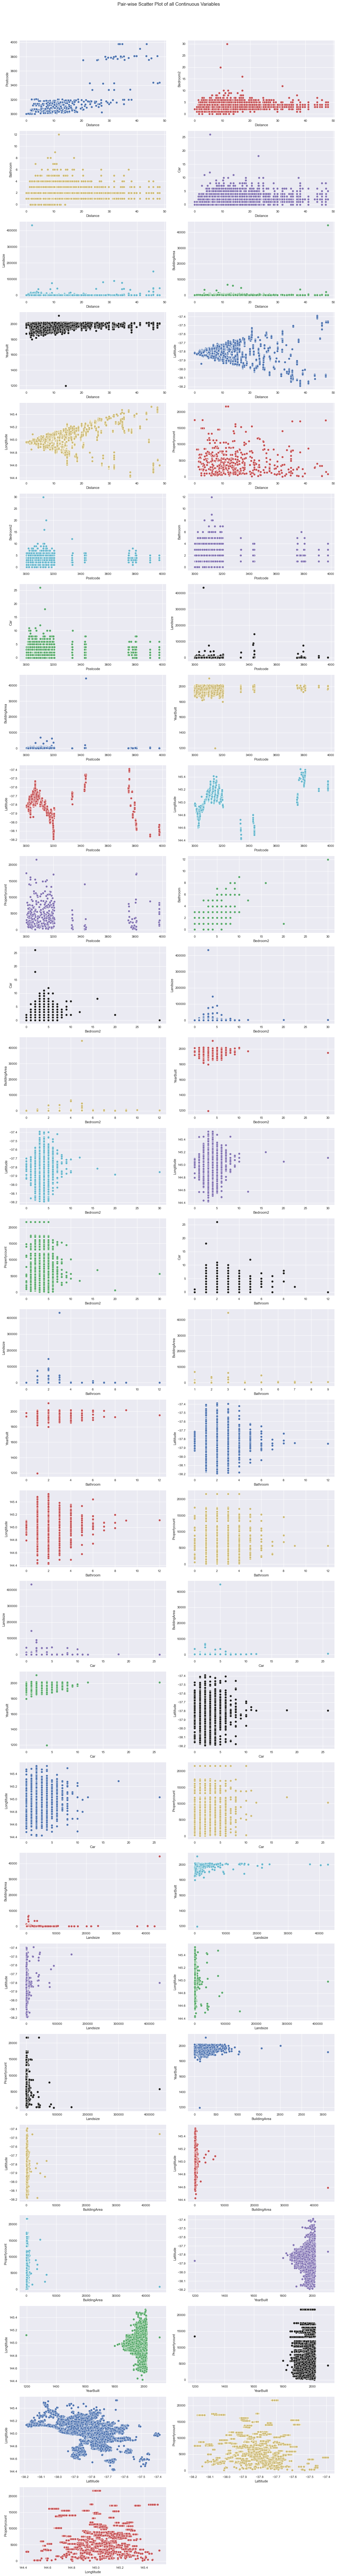

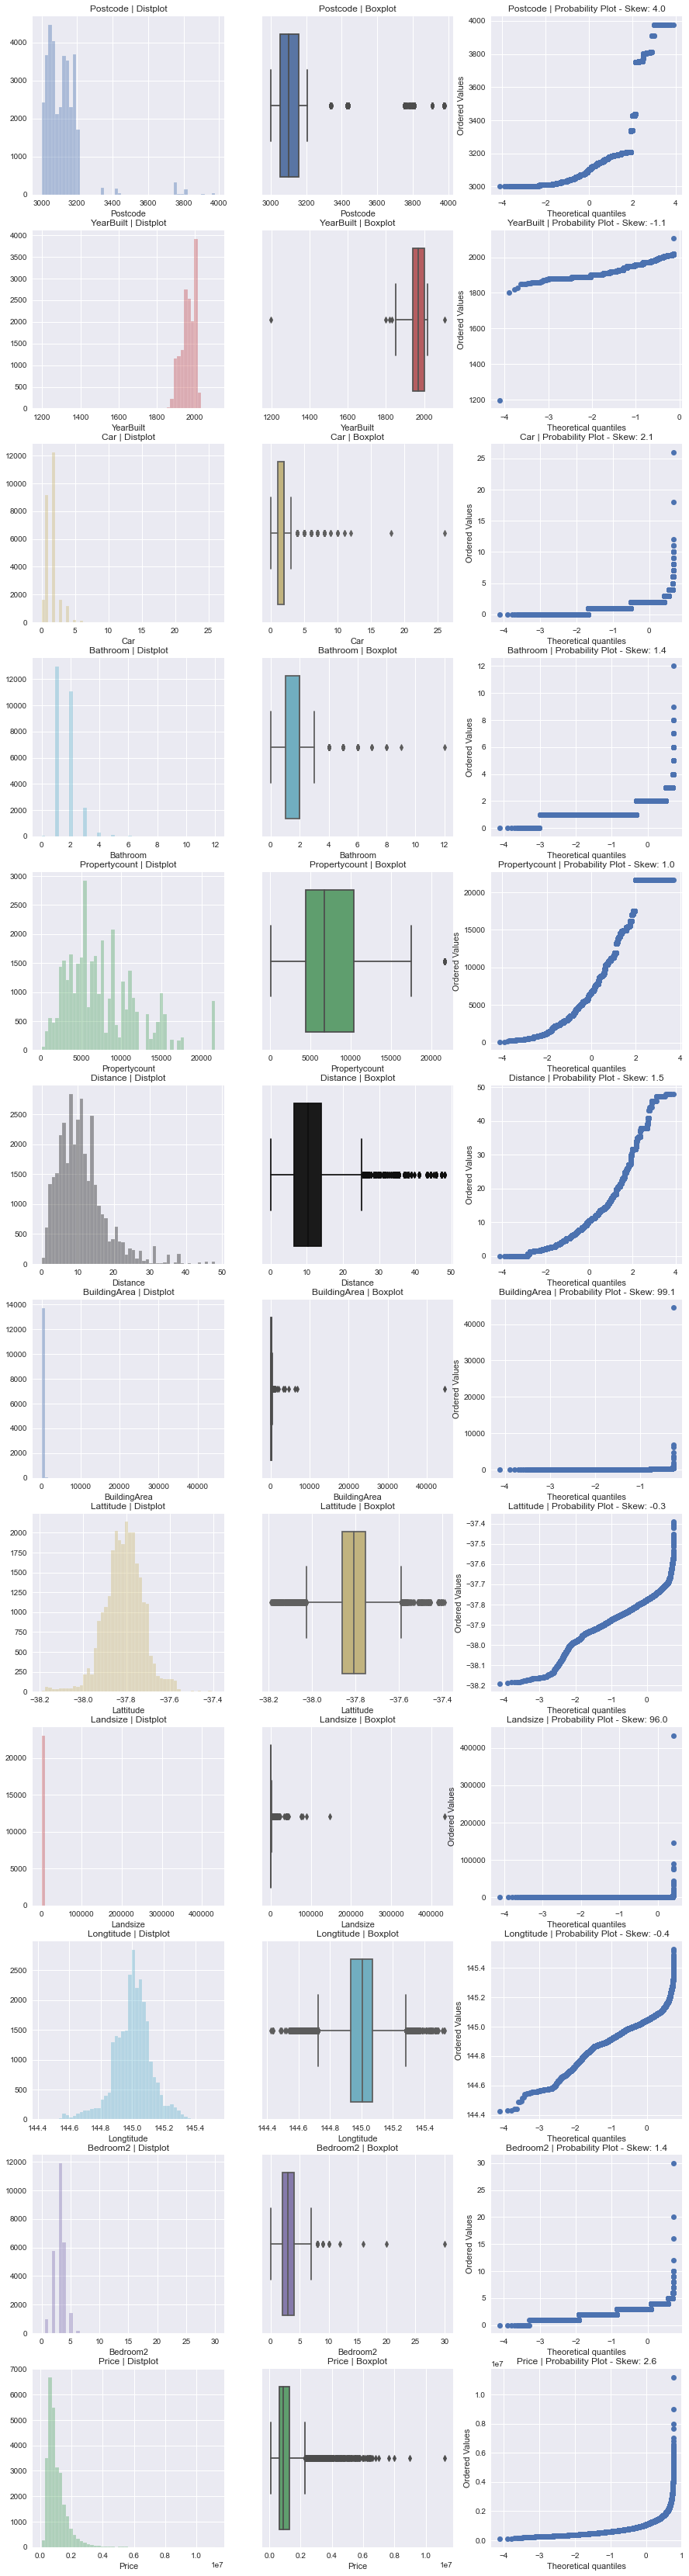

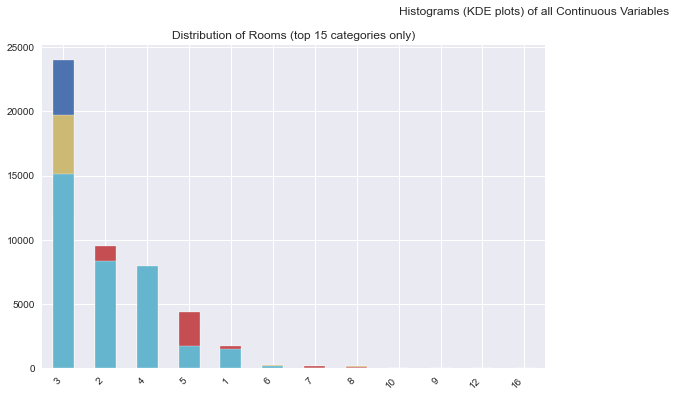

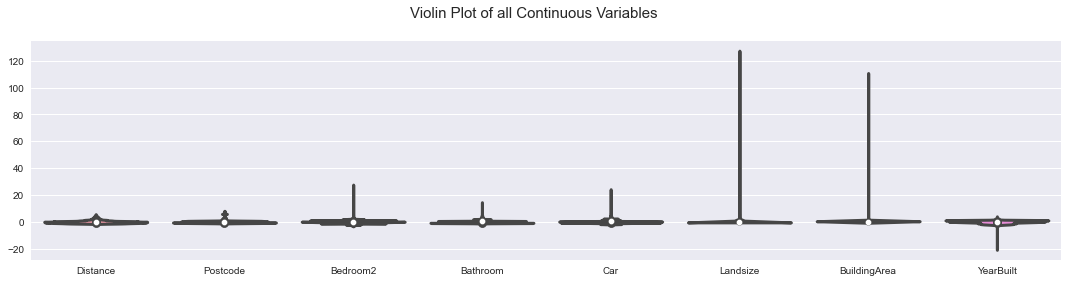

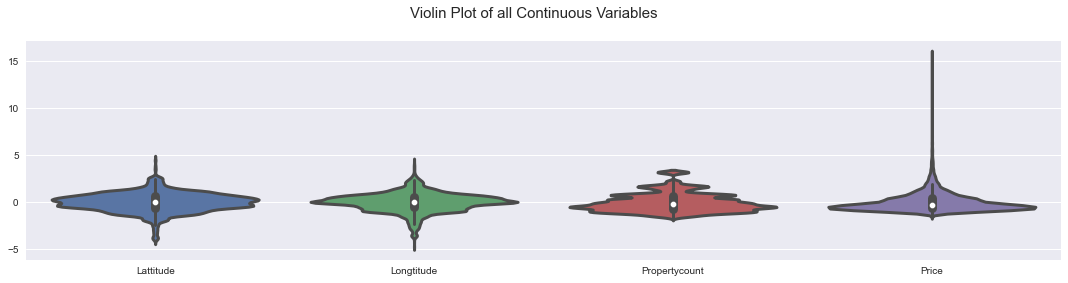

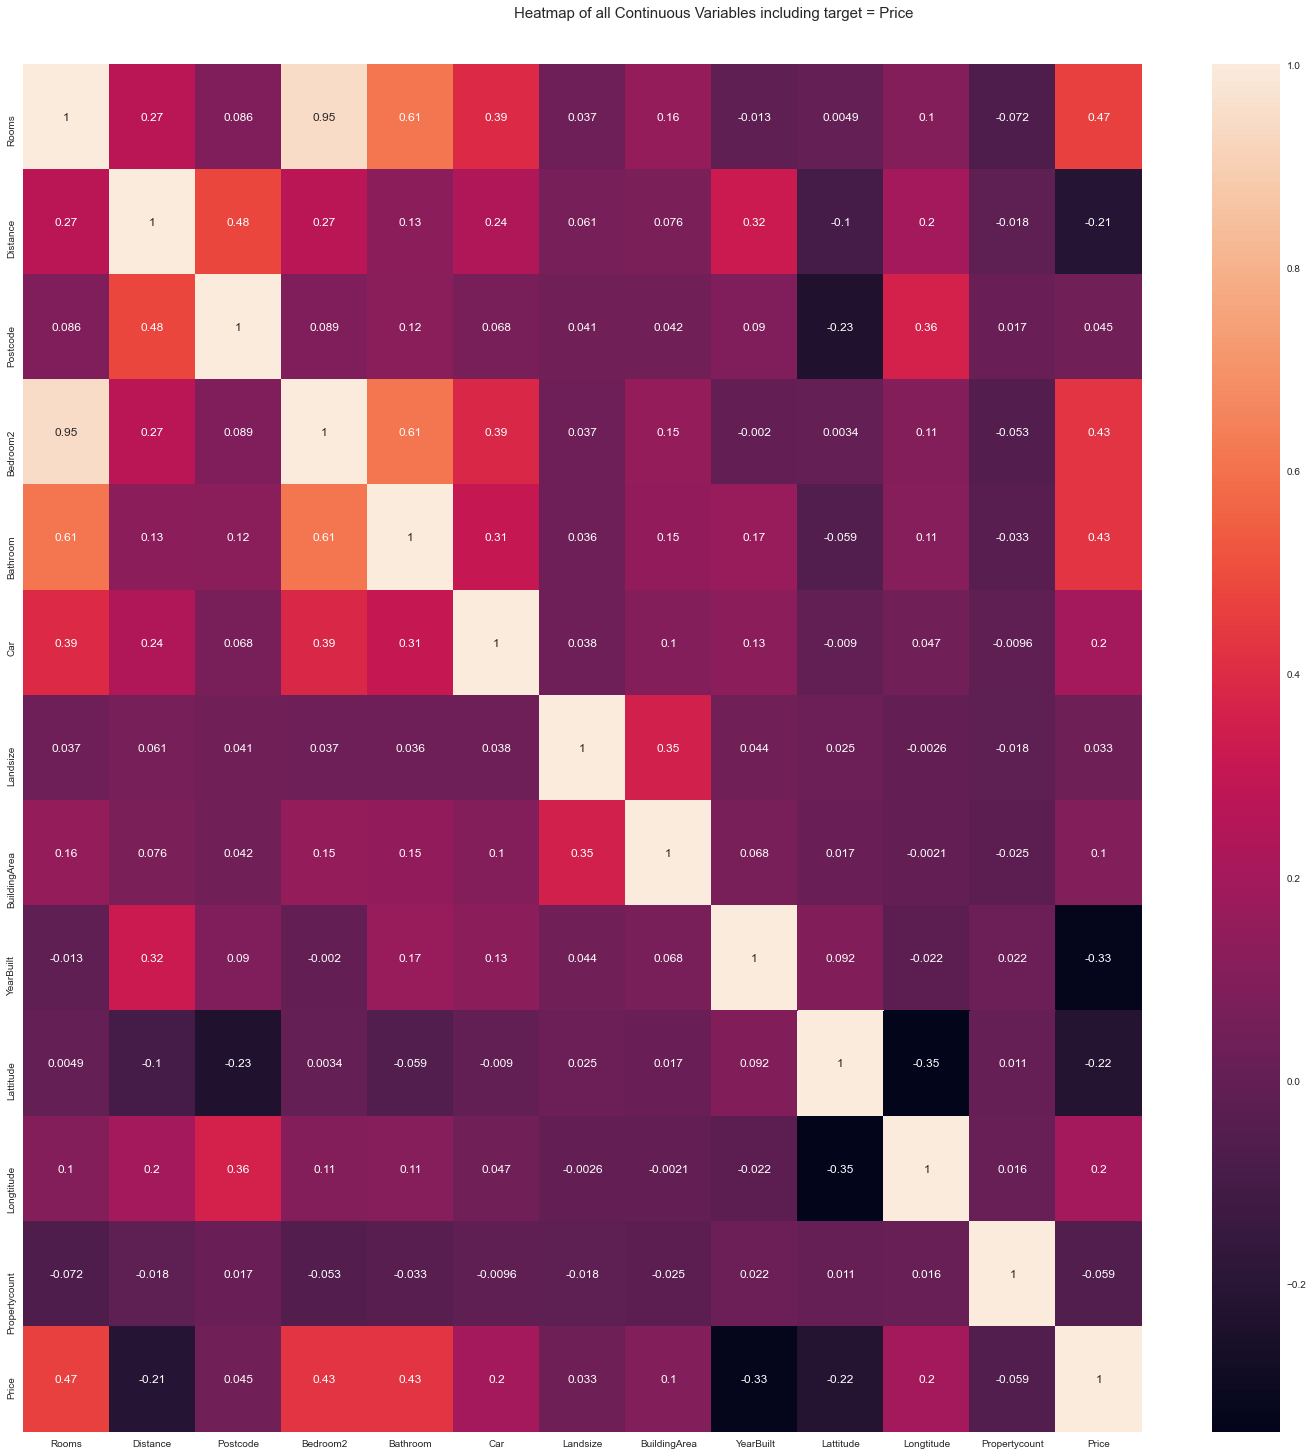

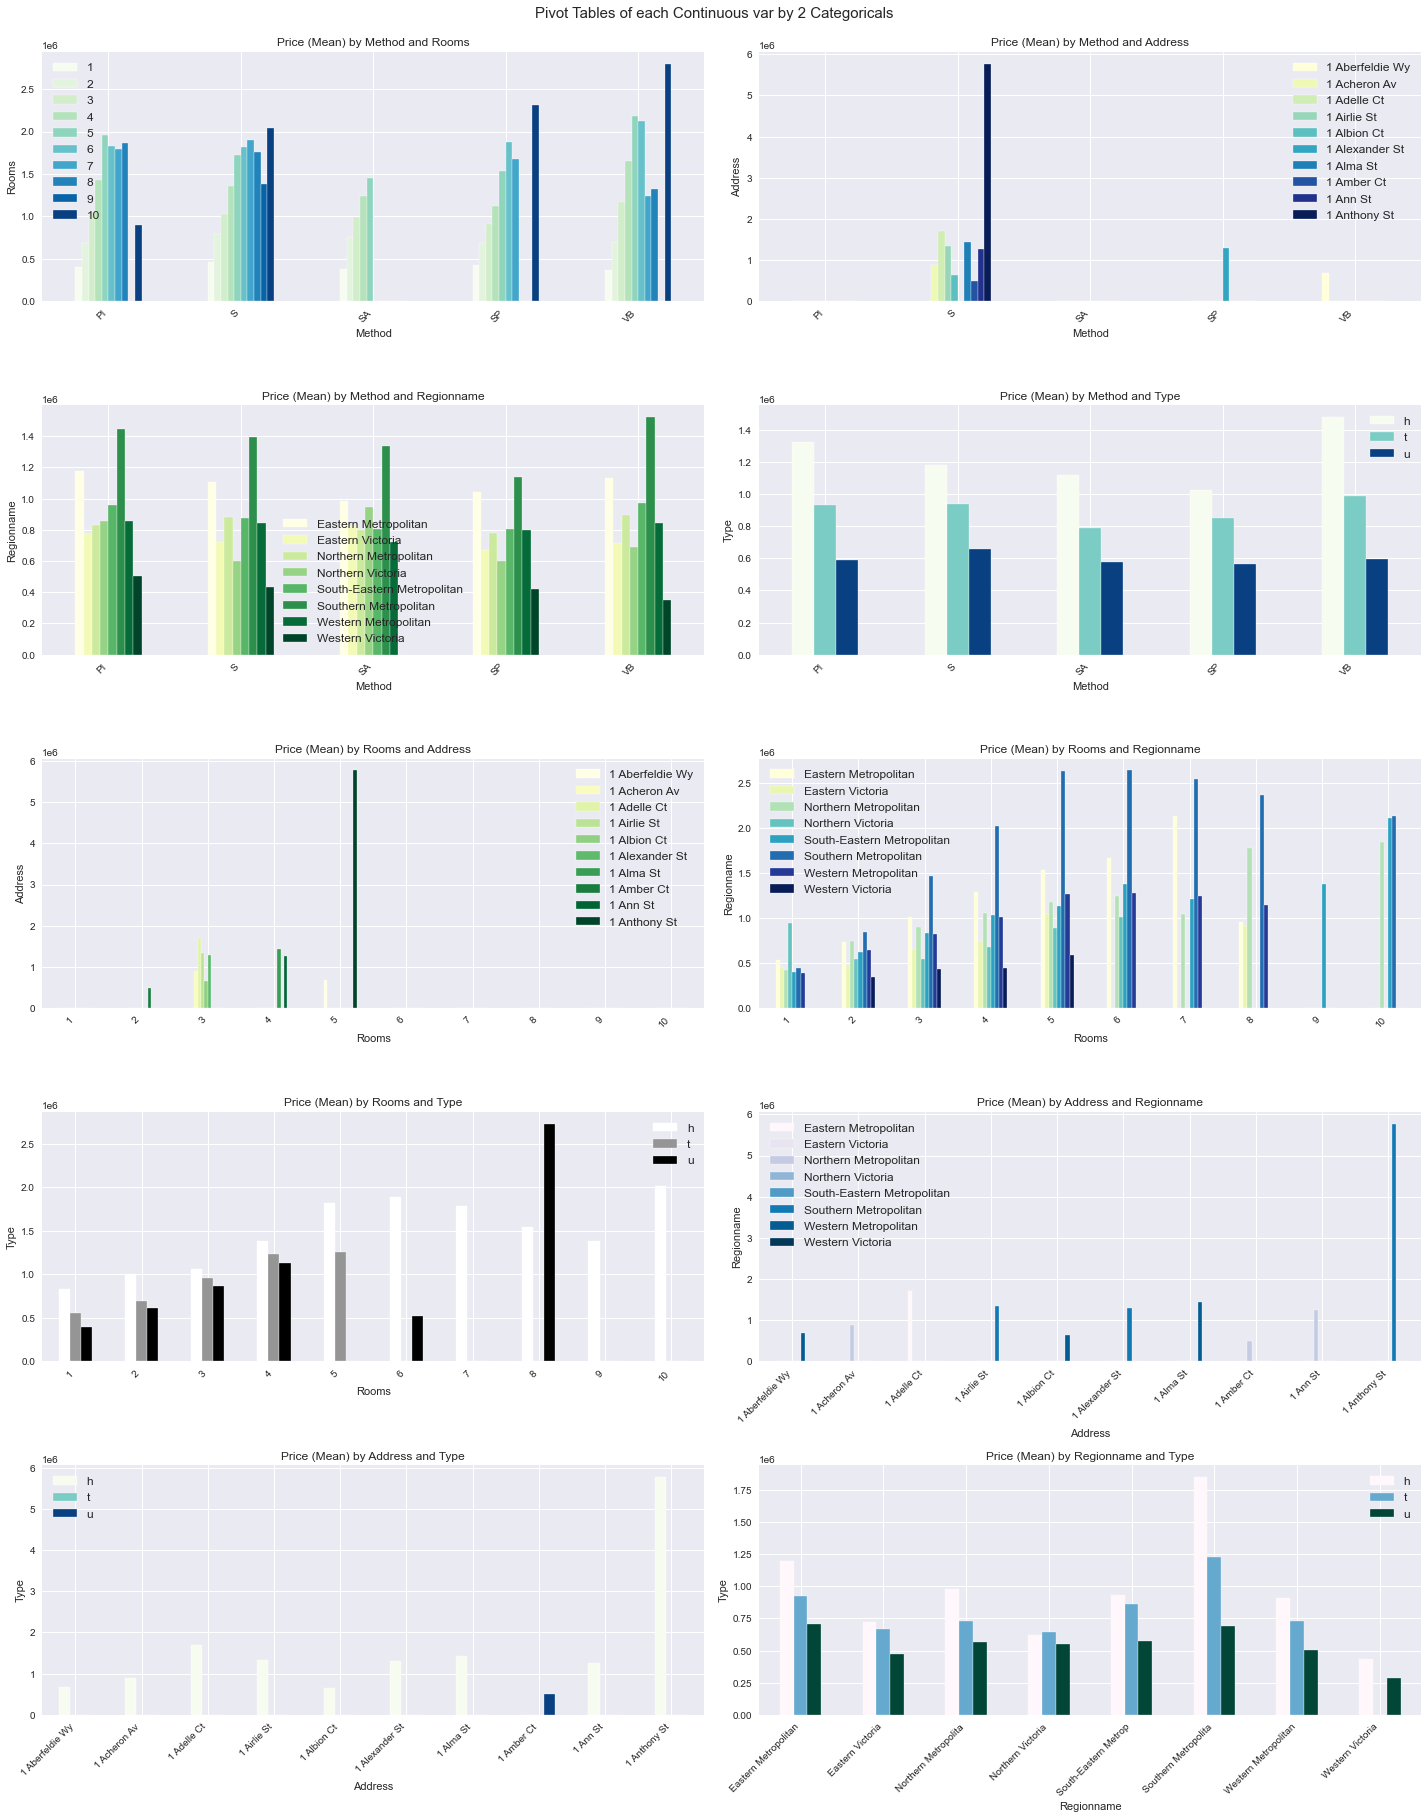

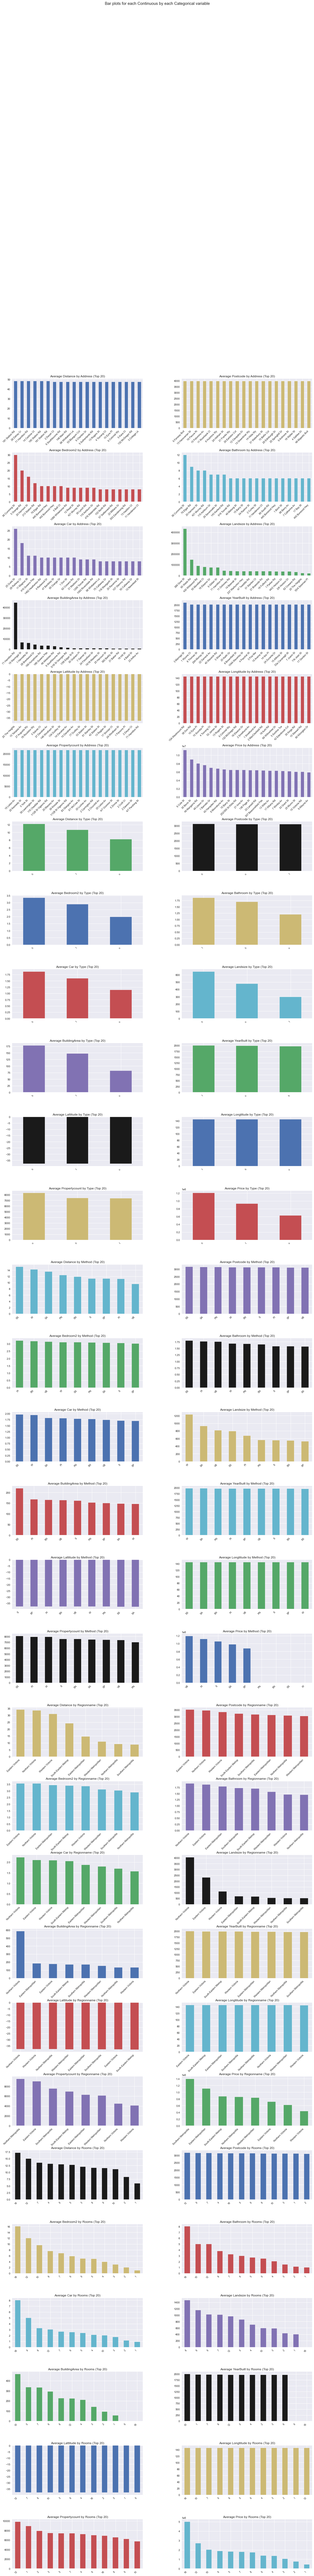

In [21]:
df = AV.AutoViz(filename="D:/Medium/3 Learned/Melbourne Housing Market/Melbourne_housing_FULL.csv",sep=',', depVar='Price', dfte=df, header=0, verbose=2, 
                 lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30)